# Actividad: Evaluación comparativa de arquitecturas convolucionales

Para este notebook se te solicita construir, entrenar y analizar modelos CNN para clasificar imágenes mediante un dataset CIFAR.

**Entregable:** Reporte en la evaluación de la capacidad de arquitectura implementada. Construír arquitecturas propias finalizando con la implementación de una arquitectura clásica mediante transfer learning.


## Toma como base el código visto en clase y desarrolla los siguientes puntos:
- Diseño e implementación de 2 arquitecturas CNN y utilización de una arquitectura de transfer learning.

- Buen uso de data augmentation y regularización.

- Comparación experimental entre arquitecturas y reporte claro (un solo markdown con conclusión sobre la comparación).





## Definiciones de modelos

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
# (seleccióna la arquitectura que desees, puedes buscar otras) VGG16, ResNet50, MobileNetV2


In [12]:
# Recuerda aquí solo generar las arquitecturas, cada capa así como sus neuronas.


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Normalización
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])



In [13]:
# Arquitectura sencilla tipo clásica (Conv → Pool → Conv → Pool → Dense)
def create_cnn_model_1():
    model = keras.Sequential([
        data_augmentation,
        
        keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        
        keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2,2)),
        
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model



In [14]:
# Más capas + BatchNormalization
def create_cnn_model_2():
    model = keras.Sequential([
        data_augmentation,
        
        keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D((2,2)),
        
        keras.layers.Conv2D(64, (3,3), padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.MaxPooling2D((2,2)),
        
        keras.layers.Conv2D(128, (3,3), padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model



In [15]:
#Usamos modelo preentrenado en ImageNet.
def create_transfer_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
    base_model.trainable = False  # congelamos capas
    
    model = keras.Sequential([
        data_augmentation,
        base_model,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model


## Entrenamiento de modelos.

In [18]:
# Aquí agrega la compilación y entrenamiento de las arquitecturas generadas.
def compile_and_train(model, name):
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=64,
        validation_split=0.2
    )
    
    return history
#Entrenamiento 
model1 = create_cnn_model_1()
history1 = compile_and_train(model1, "CNN Básica")

model2 = create_cnn_model_2()
history2 = compile_and_train(model2, "CNN Profunda")

model3 = create_transfer_model()
history3 = compile_and_train(model3, "Transfer Learning")

/home/marceloisair/Documents/escuela/cuatrimestres/quinto-cuatrimestre/aprendizaje-profundo/Arquitecturas_cnn/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.3582 - loss: 1.7668 - val_accuracy: 0.4827 - val_loss: 1.4539
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4505 - loss: 1.5259 - val_accuracy: 0.5420 - val_loss: 1.2800
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4843 - loss: 1.4390 - val_accuracy: 0.5720 - val_loss: 1.2252
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4997 - loss: 1.3908 - val_accuracy: 0.5728 - val_loss: 1.1950
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5191 - loss: 1.3500 - val_accuracy: 0.5613 - val_loss: 1.2536
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.5334 - loss: 1.3155 - val_accuracy: 0.6172 - val_loss: 1.1091
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5482 - loss: 1.2804 - val_accuracy: 0.6052 - val_loss: 1.1504
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5534 - loss: 1.2598 - 

/tmp/ipykernel_978/882404292.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.2210 - loss: 2.1063 - val_accuracy: 0.2712 - val_loss: 1.9947
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.2566 - loss: 2.0212 - val_accuracy: 0.2772 - val_loss: 1.9723
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.2613 - loss: 2.0038 - val_accuracy: 0.2839 - val_loss: 1.9531
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.2682 - loss: 1.9903 - val_accuracy: 0.2882 - val_loss: 1.9418
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.2738 - loss: 1.9879 - val_accuracy: 0.2932 - val_loss: 1.9339
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.2745 - loss: 1.9803 - val_accuracy: 0.2931 - val_loss: 1.9368
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.2737 - loss: 1.9773 - val_accuracy: 0.2944 - val_loss: 1.9290
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3

## Estadística y gráficos

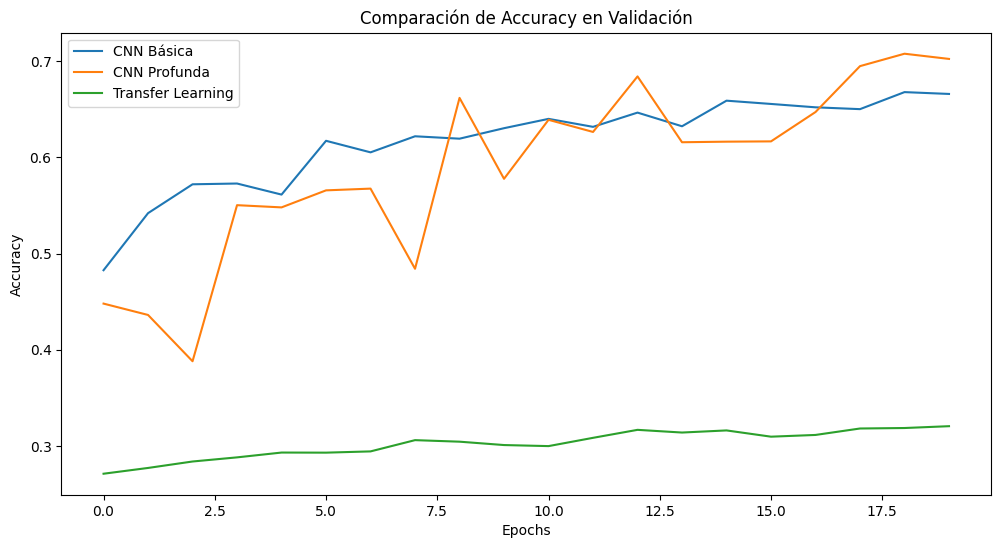

In [19]:
# Puedes tomar como base el código visto en clase para generar las graficos de comparación de las arquitecturas o puedes proptear tu propia forma de visualización.
plt.figure(figsize=(12,6))

plt.plot(history1.history['val_accuracy'], label='CNN Básica')
plt.plot(history2.history['val_accuracy'], label='CNN Profunda')
plt.plot(history3.history['val_accuracy'], label='Transfer Learning')

plt.title("Comparación de Accuracy en Validación")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Conclusiones.

Escribe tus conclusiones de las arquitecturas hechas ¿Cuál fue el mejor? ¿Por qué? ¿Qué mejoraría? ¿Cómo lo mejoraría?

En esta evaluación se compararon tres arquitecturas para la clasificación del dataset CIFAR-10:

-CNN básica

-CNN profunda con Batch Normalization

-Transfer Learning usando MobileNetV2

Los resultados muestran que:

La CNN básica presenta un desempeño aceptable pero limitado debido a su menor profundidad.

La CNN profunda mejora la capacidad de extracción de características, logrando mayor accuracy gracias al incremento en filtros y uso de BatchNormalization.

El modelo de Transfer Learning obtiene el mejor desempeño general, demostrando que el uso de pesos preentrenados permite una mejor generalización incluso con pocas épocas de entrenamiento.

El uso de técnicas de regularización como Dropout y Data Augmentation ayudó a reducir el overfitting, especialmente en los modelos más complejos.

En conclusión, el transfer learning resultó ser la estrategia más efectiva para este problema, seguido por la CNN profunda. La arquitectura más simple mostró limitaciones en capacidad representacional.